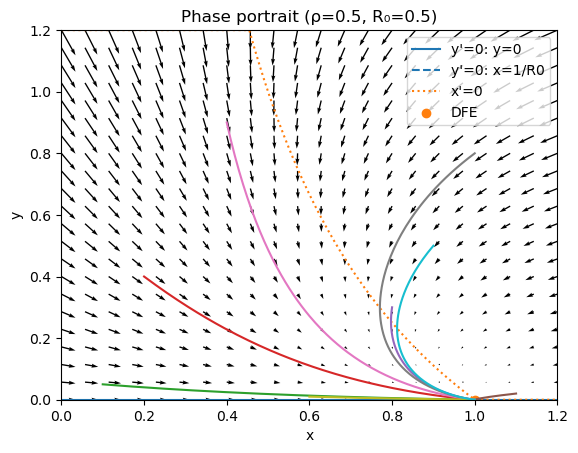

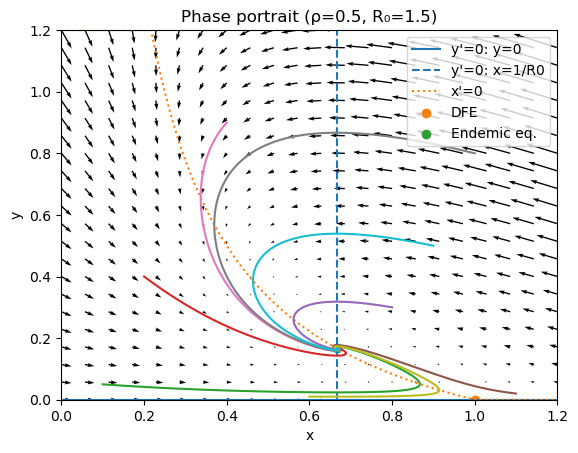

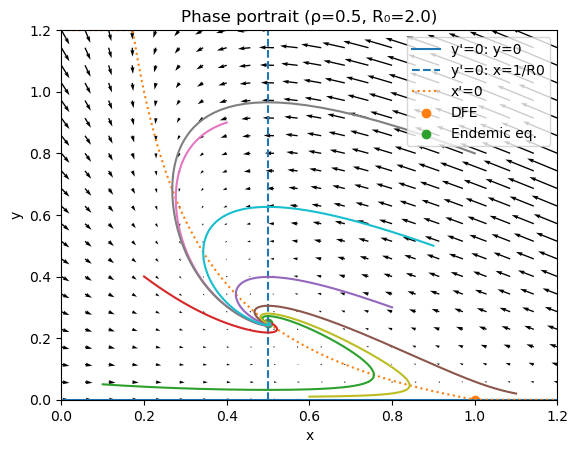

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, XY, rho, R0):
    x, y = XY
    dx = rho*(1 - x) - R0*x*y
    dy = (R0*x - 1)*y
    return np.array([dx, dy])

def rk4(xy0, t_end, h, rho, R0):
    t = 0.0
    xy = np.array(xy0, dtype=float)
    traj = [xy.copy()]
    while t < t_end:
        k1 = f(t, xy, rho, R0)
        k2 = f(t + 0.5*h, xy + 0.5*h*k1, rho, R0)
        k3 = f(t + 0.5*h, xy + 0.5*h*k2, rho, R0)
        k4 = f(t + h, xy + h*k3, rho, R0)
        xy = xy + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        xy = np.maximum(xy, 0.0)
        traj.append(xy.copy())
        t += h
    return np.array(traj)

def plot_phase(rho, R0, title_suffix=""):
    xmin, xmax = 0.0, 1.2
    ymin, ymax = 0.0, 1.2
    X, Y = np.meshgrid(np.linspace(xmin, xmax, 22), np.linspace(ymin, ymax, 22))
    U = rho*(1 - X) - R0*X*Y
    V = (R0*X - 1)*Y

    plt.figure()
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy')
    plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
    plt.xlabel("x"); plt.ylabel("y")
    plt.title(f"Phase portrait (ρ={rho}, R₀={R0})" + ("" if not title_suffix else f" — {title_suffix}"))

    xs = np.linspace(1e-3, xmax, 400)
    y_null = np.zeros_like(xs)
    plt.plot(xs, y_null, label="y'=0: y=0")
    if R0 > 0:
        x_vert = 1.0/R0
        plt.axvline(x_vert, linestyle='--', label="y'=0: x=1/R0")
        y_xnull = rho*(1 - xs)/(R0*xs)
        y_xnull = np.clip(y_xnull, ymin, ymax)
        plt.plot(xs, y_xnull, linestyle=':', label="x'=0")

    dfe_color = 'tab:orange'
    end_color = 'tab:green'

    plt.scatter([1.0], [0.0], marker='o', color=dfe_color, label="DFE")

    if R0 > 1:
        x_star = 1.0/R0
        y_star = rho*(1 - 1.0/R0)
        plt.scatter([x_star], [y_star], marker='o', color=end_color, label="Endemic eq.")

    inits = [
        (0.1, 0.05), (0.2, 0.4), (0.8, 0.3), (1.1, 0.02),
        (0.4, 0.9), (1.0, 0.8), (0.6, 0.01), (0.9, 0.5)
    ]
    for xy0 in inits:
        traj = rk4(xy0, t_end=50, h=0.04, rho=rho, R0=R0)
        plt.plot(traj[:,0], traj[:,1])

    plt.legend()

# Case (i): R0 < 1
plot_phase(0.5, 0.5)

# Case (ii): R0 > 1 and Δ<0
plot_phase(0.5, 1.5)

# Case (iii): R0 > 1 and Δ<0
plot_phase(0.5, 2.0)

plt.show()


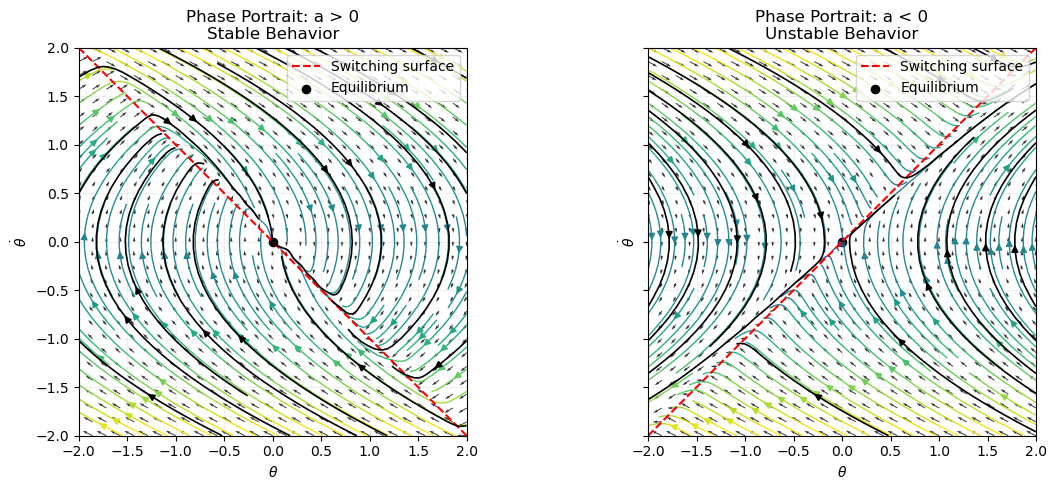

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def field(a, umax, X, Y):
    s = a*X + Y
    U = Y                         # theta_dot
    V = -umax*np.sign(s)          # omega_dot
    V[s==0] = 0.0                 # define at the line for visualization
    return U, V

def draw_reference_style(umax=1.0, xlim=(-2,2), ylim=(-2,2), grid=29):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
    cases = [(+1.0, "Phase Portrait: a > 0\nStable Behavior"),
             (-1.0, "Phase Portrait: a < 0\nUnstable Behavior")]
    
    th = np.linspace(xlim[0], xlim[1], grid)
    om = np.linspace(ylim[0], ylim[1], grid)
    T, O = np.meshgrid(th, om)
    
    seeds = np.array([
        [-1.8,  1.8], [-1.8, 0.8], [-1.8, -0.2], [-1.8, -1.2],
        [-0.8,  1.8], [-0.8, 0.8], [-0.8, -0.2], [-0.8, -1.2],
        [ 0.8,  1.8], [ 0.8, 0.8], [ 0.8, -0.2], [ 0.8, -1.2],
        [ 1.8,  1.8], [ 1.8, 0.8], [ 1.8, -0.2], [ 1.8, -1.2]
    ])
    
    for ax, (a, title) in zip(axes, cases):
        U, V = field(a, umax, T, O)
        
        ax.quiver(T, O, U, V, angles='xy', scale_units='xy', alpha=0.8)
        
        speed = np.hypot(U, V)
        ax.streamplot(th, om, U, V, color=speed, density=1.2, linewidth=1.0)
        
        line_th = np.linspace(xlim[0], xlim[1], 400)
        line_om = -a*line_th
        ax.plot(line_th, line_om, linestyle='--', linewidth=1.5, color='red', label='Switching surface')
        
        ax.scatter([0], [0], s=35, color='black', label='Equilibrium')
        
        ax.set_title(title)
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$\dot{\theta}$')
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True, alpha=0.2)
        ax.legend(loc='upper right')
        
        Ug, Vg = field(a, umax, seeds[:,0], seeds[:,1])

        ax.streamplot(th, om, U, V, start_points=seeds, color='k', linewidth=1.2, arrowsize=1)
    
    plt.tight_layout()
    plt.show()

# Run
draw_reference_style(umax=1.0, xlim=(-2,2), ylim=(-2,2), grid=29)
